# Sample usage of this module

Importing pandas because the package as of now handles only Pandas Series. Also, train_test_split to split our data.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

Importing the two main classes in the module. Modeler to model our data and Learner to train and predict on data

In [2]:
from topic_modeler.modeler import Modeler
from topic_modeler.learner import Learner

Using [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews) dataset from Kaggle. It was the first thing I saw which can be used with this on my system, so I decided to use it.

I already did some processing to the original data to make this notebook short. You can check out the preprocessing notebook [here](https://github.com/geekyJock8/topic_modeler/blob/master/wine_data_cleaning.ipynb).

In [3]:
df = pd.read_csv('processed_wine_data.csv')

In [4]:
df.head()

,description,variety
0,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,"This spent 20 months in 30% new French oak, an...",Pinot Noir
2,This re-named vineyard was formerly bottled as...,Pinot Noir
3,The producer sources from two blocks of the vi...,Pinot Noir
4,"From 18-year-old vines, this supple well-balan...",Pinot Noir


As mentioned earlier, as of now the **classes handle only Pandas Series**, so we will take out both X and Y as Pandas Series.

In [5]:
X = df['description']
Y = df['variety']

Split the data

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

## Create Modeler

Modeler class takes x_train and y_train pandas series, does some processing on the data and converts the data into required matrix forms. This is important because our learner takes Modeler object as parameter and uses that Modeler for data

In [7]:
modeler = Modeler(x_train, y_train)

Converting to lowercase
Word to index
Building feature matrix
Setting topic index
Building train output list
Build Complete


## Create Learner

Learner class is responsible for training and predicting.

In [8]:
learner = Learner(modeler)

## Training

Let's use Learner.learn() to train our data. It takes two parameters, iterations and learning rate.

In [18]:
learner.learn(iterations=1000, learning_rate=0.1)

Let's see how's our model doing:

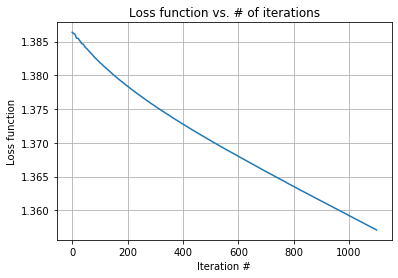

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(learner.losses)), learner.losses)
plt.grid()
plt.xlabel('Iteration #')
plt.ylabel('Loss function')
_ = plt.title('Loss function vs. # of iterations')

## Predicting

We can get predictions and probablities from the Learner.get_preds() method. It takes a pandas series of the test sentences.

In [20]:
preds, probs = learner.get_preds(x_test)

In [21]:
preds

['Chardonnay',
 'Pinot Noir',
 'Chardonnay',
 'Pinot Noir',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Pinot Noir',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Pinot Noir',
 'Pinot Noir',
 'Pinot Noir',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Pinot Noir',
 'Pinot Noir',
 'Pinot Noir',
 'Pinot Noir',
 'Pinot Noir',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Pinot Noir',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Pinot Noir',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Pinot Noir',
 'Chardonnay',
 'Chardonnay',
 'Pinot Noir',
 'Pinot Noir',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Chardonnay',
 'Pinot No

We can see we get the list of class in preds.
And below we can see, we get the probablities of each class. As we can see the probablities can get a lot better.
We can do that by training more!

In [22]:
probs

tensor([[0.3516, 0.1040, 0.3252, 0.2192],
        [0.3254, 0.1058, 0.3298, 0.2390],
        [0.3535, 0.1054, 0.3302, 0.2109],
        ...,
        [0.3503, 0.0995, 0.3379, 0.2123],
        [0.3399, 0.1052, 0.3385, 0.2164],
        [0.3695, 0.1102, 0.2993, 0.2210]])

Let's compare with correct labels to see how we are doing!

In [23]:
i = 0
correct_pred = 0
for k in y_test.index:
    if preds[i] == y_test.at[k]:
        correct_pred += 1
        
print("Accuracy = ", correct_pred/len(preds))

Accuracy =  0.2815919434492108


Not great but we can improve by doing more iterations and also, it's bit hard to differentiate these categories as they have a lot of overlapping words.